C:\Users\User\AppData\Local\Temp\ipykernel_7792\218086349.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.40      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.68      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022



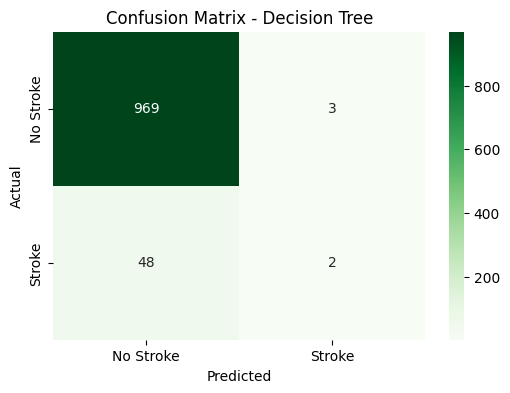

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np  
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, r2_score, median_absolute_error, max_error, mean_absolute_error, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.drop(['id'], axis=1, inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols)

X = df.drop('stroke', axis=1)
y = df['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#Kiértékelés
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
cm_dt = confusion_matrix(y_test, y_pred_knn)
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17324\3247744098.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.96      0.84      0.89       972
           1       0.09      0.32      0.14        50

    accuracy                           0.81      1022
   macro avg       0.53      0.58      0.52      1022
weighted avg       0.92      0.81      0.86      1022



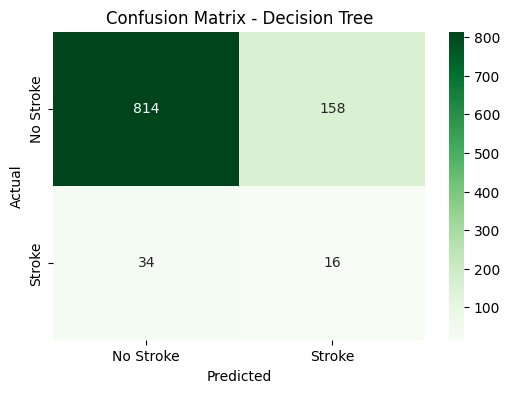

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np  
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, r2_score, median_absolute_error, max_error, mean_absolute_error, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.drop(['id'], axis=1, inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['age_bmi'] = df['age'] * df['bmi']
df['ht_hd'] = df['hypertension'] * df['heart_disease']

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols)

X = df.drop('stroke', axis=1)
y = df['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)

#Kiértékelés
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
cm_dt = confusion_matrix(y_test, y_pred_knn)
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()